<a href="https://colab.research.google.com/github/AishwaryaVelumani/Python-IP-ML/blob/master/Ada_Boosting_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
iri= datasets.load_iris()

In [4]:
x=iri.data
y=iri.target

In [5]:
xtr,xte,ytr,yte= train_test_split(x,y,test_size=0.3,random_state=0)

In [6]:
abc= AdaBoostClassifier(n_estimators=100,learning_rate=1)
abc.fit(xtr,ytr)
#default algo is SAMME.R

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [7]:
ypr=abc.predict(xte)

In [8]:
print('Accuracy: {:0.3f}'.format(100*metrics.accuracy_score(ypr,yte)),'%')

Accuracy: 91.111 %


# SAMME vs SAMME.R Algorithm

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [10]:
x,y= make_gaussian_quantiles(n_samples=13000,n_features=10,n_classes=3,random_state=1)

In [11]:
n_split=3000
xtr,xte= x[:n_split],x[n_split:]
ytr,yte= y[:n_split],y[n_split:]

In [12]:
bdt_real= AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=600, learning_rate=1)
bdt_discrete= AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=600,learning_rate=1,algorithm='SAMME')

In [13]:
bdt_real.fit(xtr,ytr)
bdt_discrete.fit(xtr,ytr)
real_test_errors=[]
discrete_test_errors=[]

In [22]:
for real_test_predict, discrete_train_predict in zip(bdt_real.staged_predict(xte),bdt_discrete.staged_predict(xte)):
    real_test_errors.append(1.-accuracy_score(real_test_predict,yte))
    discrete_test_errors.append(1.-accuracy_score(discrete_train_predict,yte))
    

In [23]:
print(real_test_errors)

[0.601, 0.5581, 0.516, 0.48819999999999997, 0.45630000000000004, 0.4266, 0.4104, 0.39070000000000005, 0.3681, 0.36119999999999997, 0.35860000000000003, 0.34530000000000005, 0.3346, 0.3265, 0.31520000000000004, 0.3087, 0.3055, 0.2996, 0.29500000000000004, 0.29469999999999996, 0.29600000000000004, 0.2935, 0.29400000000000004, 0.2921, 0.29190000000000005, 0.28369999999999995, 0.28290000000000004, 0.2821, 0.28069999999999995, 0.271, 0.2724, 0.26959999999999995, 0.2702, 0.2721, 0.27259999999999995, 0.2732, 0.27349999999999997, 0.2703, 0.27470000000000006, 0.26970000000000005, 0.26849999999999996, 0.26949999999999996, 0.2722, 0.27190000000000003, 0.2671, 0.26670000000000005, 0.26770000000000005, 0.2704, 0.26890000000000003, 0.27159999999999995, 0.2693, 0.26959999999999995, 0.27090000000000003, 0.26890000000000003, 0.27359999999999995, 0.27159999999999995, 0.2711, 0.26970000000000005, 0.26890000000000003, 0.26980000000000004, 0.27259999999999995, 0.26980000000000004, 0.26970000000000005, 0.26

In [16]:
n_trees_discrete= len(bdt_discrete)
n_trees_real= len(bdt_real)
print(n_trees_discrete)
print(type(n_trees_discrete))

600
<class 'int'>


In [17]:
discrete_estimator_errors= bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors= bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights= bdt_discrete.estimator_weights_[:n_trees_discrete]
real_estimator_weights= bdt_real.estimator_weights_[:n_trees_real]

In [18]:
print(discrete_estimator_errors.shape)

(600,)


In [19]:
print(discrete_estimator_weights.shape)

(600,)


**Visualisation**

In [20]:
#fig= plt.gcf()
#fig.set_size_inches(50.0,50.0,forward=True)

0.7746583620779753


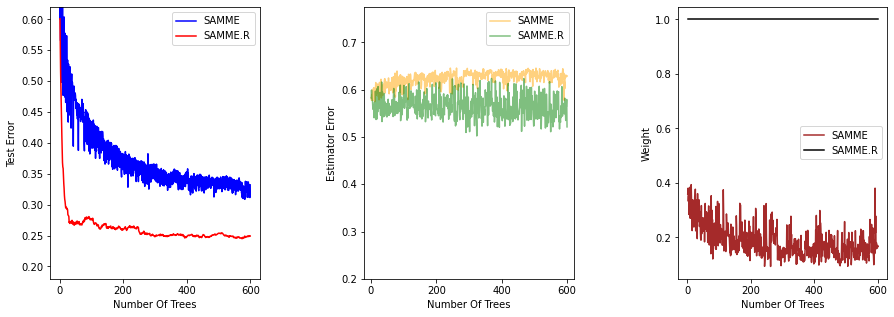

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.plot(range(1,n_trees_discrete+1),discrete_test_errors,c='blue',label='SAMME')
plt.plot(range(1,n_trees_real+1),real_test_errors,c='red',label='SAMME.R')
plt.legend()
plt.ylabel('Test Error')
plt.xlabel('Number Of Trees')
plt.ylim(0.18,0.62)

plt.subplot(132)
plt.plot(range(1,n_trees_discrete+1),discrete_estimator_errors,c='orange',label='SAMME',alpha=0.5)
plt.plot(range(1,n_trees_real+1),real_estimator_errors,c='green',label='SAMME.R',alpha=0.5)
plt.xlabel('Number Of Trees')
plt.ylabel('Estimator Error')
plt.legend()
yup=max( real_estimator_errors.max(), discrete_estimator_errors.max()) * 1.2
plt.ylim((.2, yup))
print(yup)
plt.xlim((-20,len(bdt_discrete)+20))

plt.subplot(133)
plt.plot(range(1,n_trees_discrete+1),discrete_estimator_weights,'brown',label='SAMME')
plt.plot(range(1,n_trees_real+1),real_estimator_weights,'black',label='SAMME.R')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number Of Trees')
#plt.ylim((0,discrete_estimator_weights.max()*1.2))
#plt.xlim((-20,n_trees_discrete+20))

plt.subplots_adjust(wspace=0.5)
#print(real_estimator_weights)